# Reflexer Model & Simulation

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.plotting.backend = "plotly"

import sys
sys.path.append('./models/v1')

from models.v1.run import run

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = run(drop_midsteps=True)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 16, 2, 15)
Execution Method: local_simulations
SimIDs   : [0, 0]
SubsetIDs: [0, 1]
Ns       : [0, 1]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 2.90s


In [32]:
df = data.copy()
df

,index,error_star,error_hat,old_error_star,old_error_hat,error_star_integral,error_hat_integral,error_star_derivative,error_hat_derivative,target_rate,...,market_price,debt_price,timedelta,timestamp,blockheight,simulation,subset,run,substep,timestep
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2020-09-06 18:06:53.730895,0,0,0,1,0,0
1,6,0,0.001838233086653241971,0,0,0,3.537679575264164174024,0,0,0,...,1,1.001838233086653241971,3849,2020-09-06 19:11:02.730895,256,0,0,1,6,1
2,12,-0.000562989646927198727,0.001242400024975298959,0,0,0,10.328935269849282537000,-0.000000127691006334177,-0.000000127691006334177,0.000000039096503258852,...,1.000562989646927198727,1.001805389671902497686,4409,2020-09-06 20:24:31.730895,549,0,0,1,6,2
3,18,-0.000401353748938379484,0.000738981914857303511,0,0,0,14.606738877947871154685,0.000000037433047241498,0.000000037433047241498,0.000000027871788120742,...,1.000573745089486274960,1.001312727004343578471,4318,2020-09-06 21:36:29.730895,836,0,0,1,6,3
4,24,-0.000437539240349520206,0.000175036184664345280,0,0,0,16.563194619973960392965,-0.000000008452579166381,-0.000000008452579166381,0.000000030384669468734,...,1.000730308953012498765,1.000905345137676844045,4281,2020-09-06 22:47:50.730895,1121,0,0,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,8617,-0.000058018750303602463,0.000744094468428125167,0,0,0,-1156.257396598267763134903,-0.000000316176344679298,-0.000000316176344679298,0.000000004029079882174,...,0.956989443737394268922,0.957733538205822394089,5104,2020-10-16 07:54:03.730895,227615,0,1,1,6,716
1438,8623,0.000387273713710108906,-0.000301799240576929744,0,0,0,-1154.696315591566969078628,0.000000063081522030516,0.000000063081522030516,-0.000000026894007896550,...,0.956563830219016046976,0.956262030978439117232,7059,2020-10-16 09:51:42.730895,228085,0,1,1,6,717
1439,8629,0.000060285274156577305,-0.000762577716831799987,0,0,0,-1157.582373711580739892115,-0.000000060296595897767,-0.000000060296595897767,-0.000000004186477371964,...,0.956709163709636387106,0.955946585992804587119,5423,2020-10-16 11:22:05.730895,228446,0,1,1,6,718
1440,8635,0.000354975545036851909,0.002275928815201967052,0,0,0,-1154.000271661738554447172,0.000000062249740363372,0.000000062249740363372,-0.000000024651079516470,...,0.956392751893277024777,0.958668680708478991830,4734,2020-10-16 12:40:59.730895,228761,0,1,1,6,719


In [6]:
FXcols = [
    'error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price'
]

In [7]:
for c in FXcols:
    print(c)
    df[c] = df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [8]:
df['target_rate_hourly'] = df.target_rate * 3600
df['error_star_derivative_scaled'] = df.error_star_derivative * 3600
df['error_hat_derivative_scaled'] = df.error_star_derivative * 3600

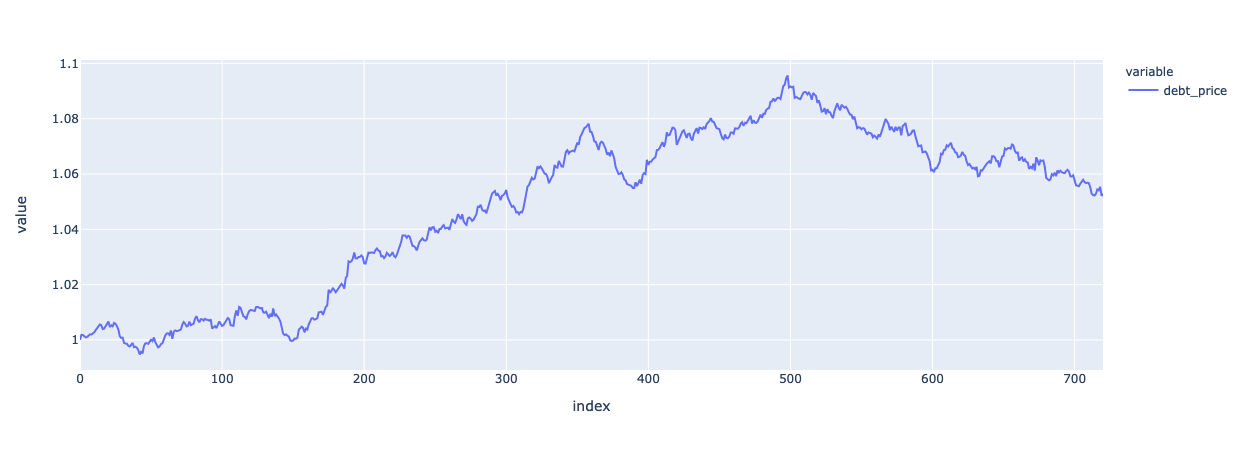

In [11]:
df.debt_price.plot()

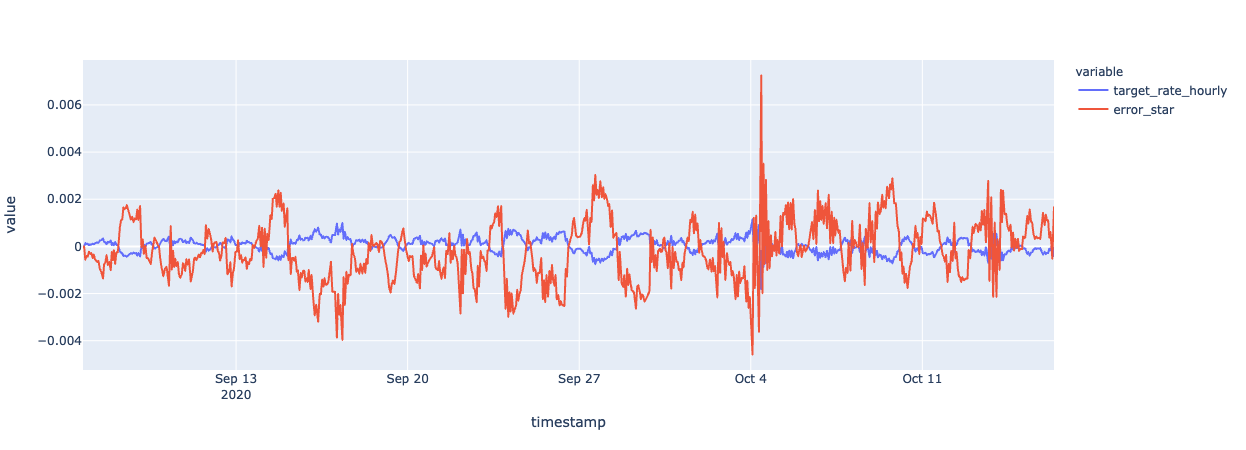

In [12]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

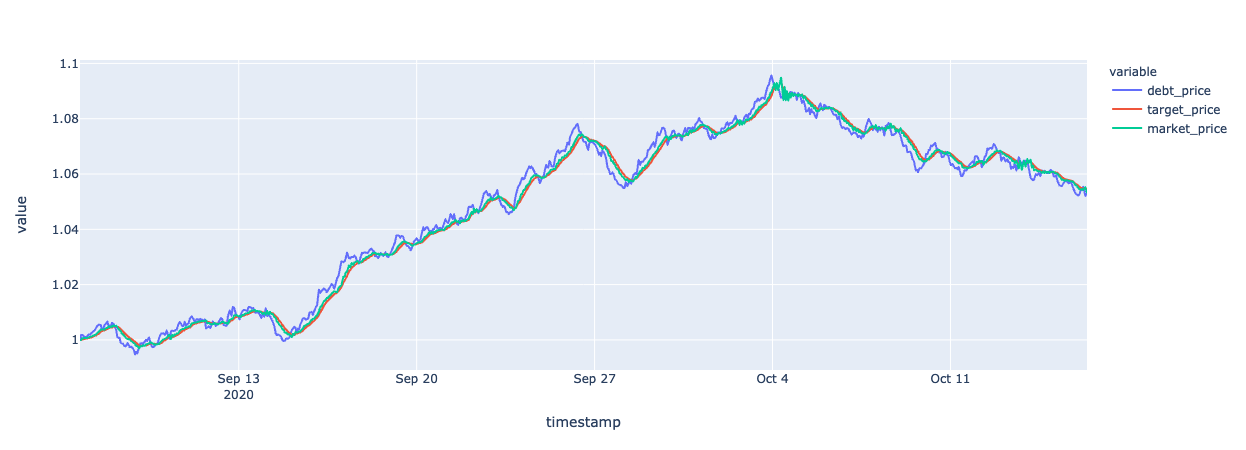

In [22]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

In [15]:
def integral_plot(df):
    from matplotlib.patches import Rectangle

    df['seconds'] = df.timedelta.cumsum()


    x=df.seconds.values
    y=df.error_star.values
    h=(df.error_star.shift(periods=-1)+df.error_star)/2
    w=df.timedelta.values

    plt.figure(figsize=(18, 12))
    plt.plot(x,y , marker='.',linestyle='--', color='r')

    ax = plt.gca()

    for p in range(len(x)-1):
        ax.add_patch(
            Rectangle(
            (x[p], 0),
            w[p+1],
            h[p+1],
            edgecolor = 'blue',
            facecolor = 'cyan',
            fill=True
        ) )

    plt.title('Visualizing Numerical Integration')
    plt.xlabel('Time passed in seconds')
    plt.ylabel('Observed Error')

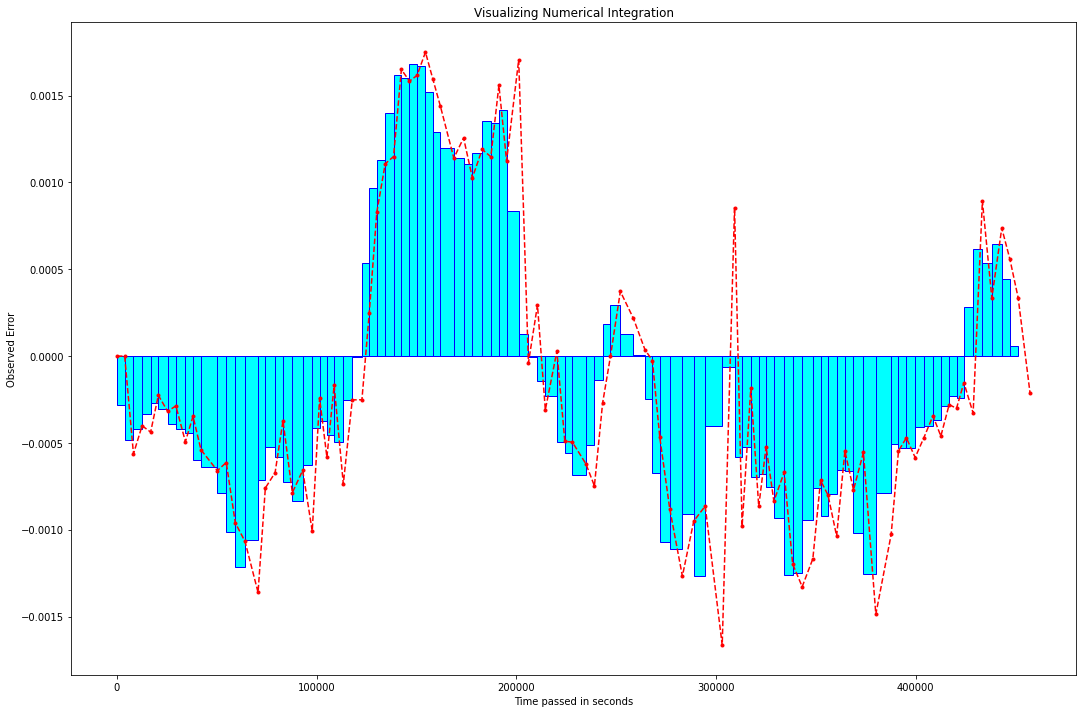

In [17]:
integral_plot(df[df.timestep<100])

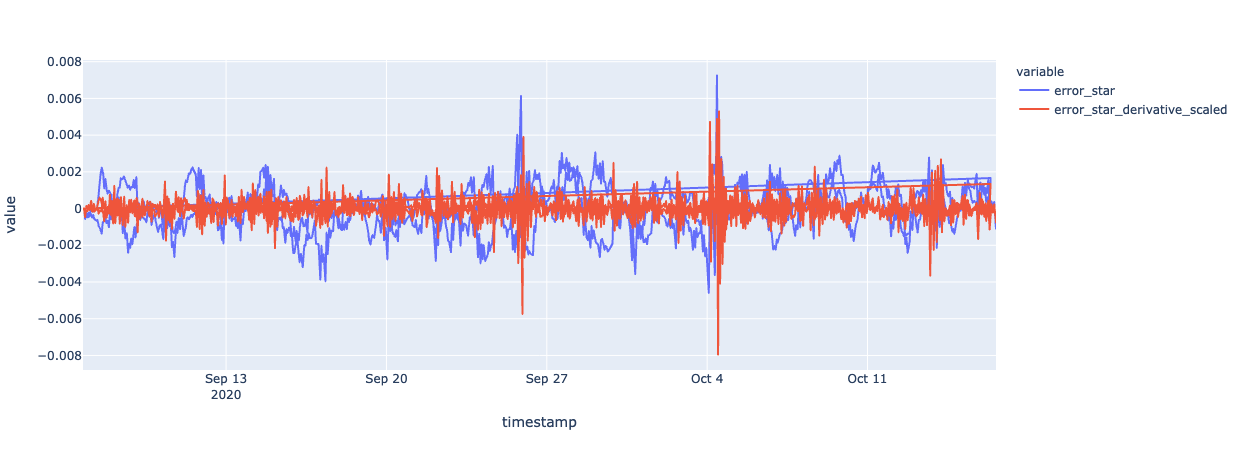

In [18]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])

Plotly `hist()` error, see: https://github.com/plotly/plotly.py/pull/2713

In [23]:
df.timedelta.apply(lambda x: x/3600).hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [25]:
df.error_star.hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [26]:
import seaborn as sns; sns.set(style="white", color_codes=True)

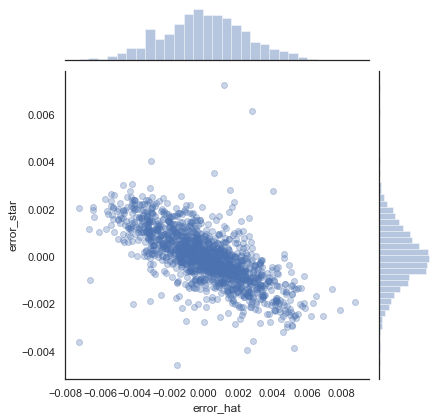

In [27]:
g = sns.jointplot(x="error_hat", y="error_star", alpha=.3, data=df)

In [28]:
3600**2

12960000